<a href="https://colab.research.google.com/github/JulianaRamos2021/Previsao_compras/blob/main/Previs%C3%A3o_de_compras_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usando SVM para prever intenção de compra.


In [53]:
from platform import python_version
print('Versão da linguagem Python Usada neste Jupyter Notebook:', python_version())

Versão da linguagem Python Usada neste Jupyter Notebook: 3.7.15


In [54]:
#Instalar pacote Watermark. Pacote grava versões de outros pacotes neste jupyter notebook.
!pip install -q -U watermark

In [55]:
#Pacotes que precisaremos para o projeto
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore") 




In [56]:
#Versão dos pacotes usados no jupyter notebook
%reload_ext watermark
%watermark -a "Ciência dos Dados #NaPrática" --iversions

Author: Ciência dos Dados #NaPrática

seaborn   : 0.11.2
pandas    : 1.3.5
matplotlib: 3.2.2
numpy     : 1.21.6
sklearn   : 1.0.2



# BAIXANDO BASE DE DADOS

In [57]:
#Montar o Drive criando uma pasta no Google Drive criando a pasta "Previsão compras"
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/Previsao_compras"

In [58]:
#Salvando dados CSV DIRETAMENTE do site na pasta criada no Google Drive.
!wget -P "/content/drive/MyDrive/Colab Notebooks/Previsao_compras" https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

--2022-11-20 16:53:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/x-httpd-php]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/Previsao_compras/online_shoppers_intention.csv.3’

online_shoppers_int 100%[===================>]   1.02M  3.06MB/s    in 0.3s    

2022-11-20 16:53:26 (3.06 MB/s) - ‘/content/drive/MyDrive/Colab Notebooks/Previsao_compras/online_shoppers_intention.csv.3’ saved [1072063/1072063]



In [74]:
#Criando um dataframe definido como df_original
df_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Previsao_compras/online_shoppers_intention.csv") 
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Ajustando nome das colunas. 

In [75]:
#Alterando nomes das colunas
df.columns = ['Administrativo', 'Duração_Administrativo', 'Informativo',
       'Duração_Informativo', 'Relacionada_ao_produto', 'Duração_relacionada_ao_produto',
       'Taxas_de_rejeição', 'Taxas_de_saída', 'Valores_da_página', 'Dia_especial', 'Mês',
       'Sistemas_operacionais', 'Navegador', 'Região', 'Tipo_de_tráfeco', 'Tipo_de_visitante',
       'Fim_de_semana', 'Receita']
     

In [79]:
#Vendo resultado
df_original.head()

,Administrativo,Duração_Administrativo,Informativo,Duração_Informativo,Relacionada_ao_produto,Duração_relacionada_ao_produto,Taxas_de_rejeição,Taxas_de_saída,Valores_da_página,Dia_especial,Mês,Sistemas_operacionais,Navegador,Região,Tipo_de_tráfeco,Tipo_de_visitante,Fim_de_semana,Receita
0,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.693147,0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.693147,0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.693147,0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# CONHECENDO MAIS DETALHES SOBRE A BASE DE DADOS

**Informações do conjunto de dados:**

O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões.
O conjunto de dados foi formado para que cada sessão
pertenceria a um usuário diferente em um período de 1 ano para evitar
qualquer tendência a uma campanha específica, dia especial, usuário
perfil ou período.


**Informações do atributo:**

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos.
O atributo 'Revenue' pode ser usado como o rótulo da classe.

"Administrativo", "Duração Administrativa", "Informativo", "Duração Informativa", "Relacionado ao Produto" e "Duração Relacionado ao Produto" representam o número de diferentes tipos de páginas visitadas pelo visitante naquela sessão e o tempo total gasto em cada uma delas essas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário realiza uma ação, por exemplo, passando de uma página para outra. Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página do site de comércio eletrônico. O valor do recurso "Taxa de rejeição" para uma página da Web refere-se à porcentagem de visitantes que entram no site a partir dessa página e depois saem ("bounce") sem acionar nenhuma outra solicitação ao servidor analítico durante essa sessão. O valor do recurso "Taxa de saída" para uma página da Web específica é calculado como para todas as exibições de página da página, a porcentagem que foi a última na sessão. O recurso "Valor da página" representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico. O recurso "Dia Especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, Dia das Mães, Dia dos Namorados) em que as sessões têm maior probabilidade de serem finalizadas com transação. O valor desse atributo é determinado considerando a dinâmica do e-commerce como o tempo entre a data do pedido e a data de entrega. Por exemplo, para o dia de Valentina, esse valor assume um valor diferente de zero entre 2 de fevereiro e 12 de fevereiro, zero antes e depois dessa data, a menos que seja próximo a outro dia especial, e seu valor máximo de 1 em 8 de fevereiro. sistema, navegador, região, tipo de tráfego, tipo de visitante como visitante recorrente ou novo, um valor booleano indicando se a data da visita é final de semana e mês do ano

In [80]:
#Verificar tamanho do dataset
df_original.shape

(12330, 18)

In [81]:
#Tipo de dados
df_original.dtypes

Administrativo                      int64
Duração_Administrativo            float64
Informativo                         int64
Duração_Informativo               float64
Relacionada_ao_produto            float64
Duração_relacionada_ao_produto    float64
Taxas_de_rejeição                 float64
Taxas_de_saída                    float64
Valores_da_página                 float64
Dia_especial                      float64
Mês                                object
Sistemas_operacionais               int64
Navegador                           int64
Região                              int64
Tipo_de_tráfeco                     int64
Tipo_de_visitante                  object
Fim_de_semana                        bool
Receita                              bool
dtype: object

In [82]:
#Verificando valores nulos
print(df_original.isna().sum())

Administrativo                    0
Duração_Administrativo            0
Informativo                       0
Duração_Informativo               0
Relacionada_ao_produto            0
Duração_relacionada_ao_produto    0
Taxas_de_rejeição                 0
Taxas_de_saída                    0
Valores_da_página                 0
Dia_especial                      0
Mês                               0
Sistemas_operacionais             0
Navegador                         0
Região                            0
Tipo_de_tráfeco                   0
Tipo_de_visitante                 0
Fim_de_semana                     0
Receita                           0
dtype: int64


In [83]:
#Esse dataset não possui valores nulos, porém se houvesse para retirar uso: df_original.dropna(inplace = True)


In [84]:
#Colunas possuem valores únicos?
df_original.nunique()

Administrativo                      27
Duração_Administrativo            3335
Informativo                         17
Duração_Informativo               1258
Relacionada_ao_produto             311
Duração_relacionada_ao_produto    9551
Taxas_de_rejeição                 1872
Taxas_de_saída                    4777
Valores_da_página                 2704
Dia_especial                         6
Mês                                 10
Sistemas_operacionais                8
Navegador                           13
Região                               9
Tipo_de_tráfeco                     20
Tipo_de_visitante                    3
Fim_de_semana                        2
Receita                              2
dtype: int64

In [85]:
#Preparando os dados

#Criando uma cópia da minha base de dados
df = df_original.copy()

#Listas vazias para os resultados
continuous = []
categorical = []

#loop pelas colunas (vamos desconsiderar a última coluna pois é target. O comando abaixo classifica as colunas com menos de 30 diferentes tipos de dados em dados
#contínuos e acima de 30 diferentes tipos de dados em variável categorica )

for c in df.columns[:-1]:
  if df.nunique ()[c] >= 30:
      continuous.append(c)
  else:
    categorical.append(c)

In [86]:
#Verificando as variáveis contínuas
continuous

['Duração_Administrativo',
 'Duração_Informativo',
 'Relacionada_ao_produto',
 'Duração_relacionada_ao_produto',
 'Taxas_de_rejeição',
 'Taxas_de_saída',
 'Valores_da_página']

In [87]:
categorical

['Administrativo',
 'Informativo',
 'Dia_especial',
 'Mês',
 'Sistemas_operacionais',
 'Navegador',
 'Região',
 'Tipo_de_tráfeco',
 'Tipo_de_visitante',
 'Fim_de_semana']

In [88]:
#Verificando as varíaveis categóricas

df[categorical].head()

,Administrativo,Informativo,Dia_especial,Mês,Sistemas_operacionais,Navegador,Região,Tipo_de_tráfeco,Tipo_de_visitante,Fim_de_semana
0,0,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


# Visualização gráfica dos dados

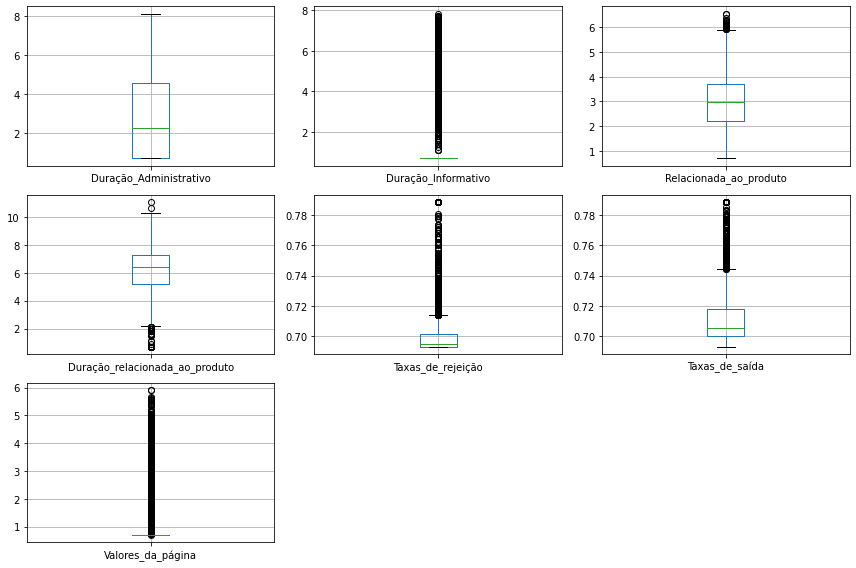

In [89]:
#Variável contínua (Imediatamente percebo muitos outliers, precisa de tratamento)

#Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

#Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  df.boxplot(col);
  plt.tight_layout()

plt.savefig('boxplot1.png')

In [90]:
# Transformação de log nas variáveis contínuas
# Utilizamos transformações para podermos comparar dados com grandezas diferentes e também conseguir uma relação entre os dados de maneira mais justa. 
# Em caso de dúvidas ver explicação completa em : http://rstudio-pubs-static.s3.amazonaws.com/289147_99e32d5403f942339c3fe05414ac62fd.html

df[continuous] = np.log1p(1 + df[continuous])

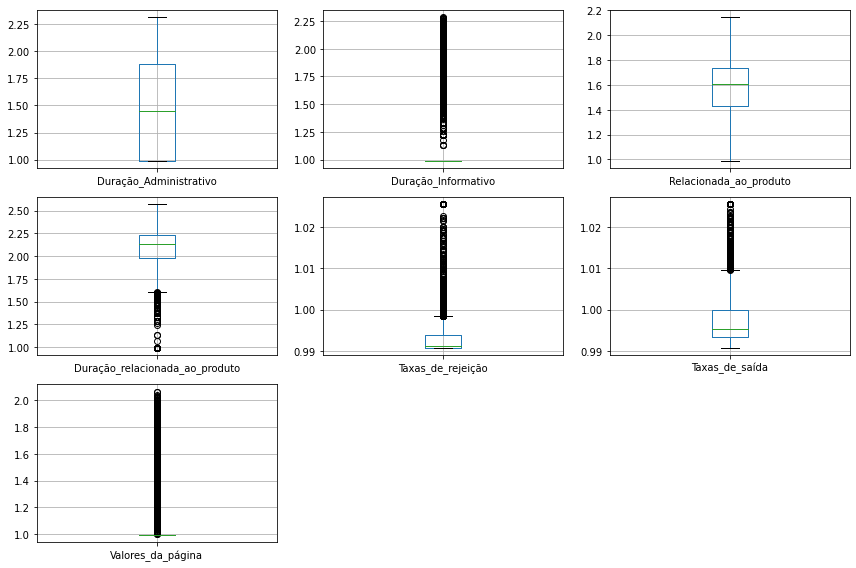

In [91]:
#Plot das variáveis contínuas

#Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

#Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  df.boxplot(col);
  plt.tight_layout()

plt.savefig('boxplot2.png')


Matriz de Correlação Entre Variáveis Contínuas.


Aqui identifico se existe alguma relação entre as variáveis contínuas, ou aquelas mais próximas. Exemplo:"PageValues" e "Revenue" está mais próxima e portanto entendemos que possuem alguma relação.

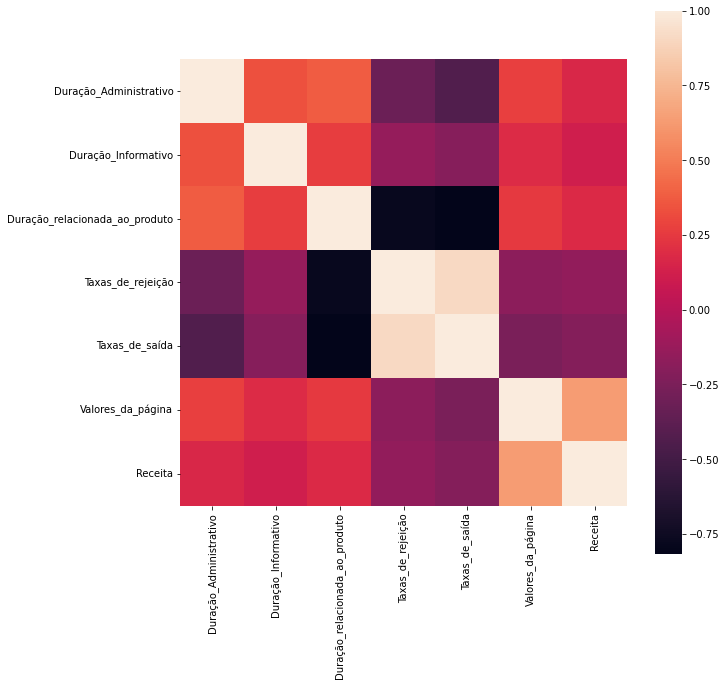

In [94]:
# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação
sns.heatmap(df[['Duração_Administrativo',
                'Duração_Informativo',
                'Duração_relacionada_ao_produto',
                'Taxas_de_rejeição',
                'Taxas_de_saída',
                'Valores_da_página',
                'Receita']].corr(), vmax = 1., square = True)
